# Fashion MNIST

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) can be used as drop-in replacement for the original MNIST dataset (10 categories of handwritten digits). It shares the same image size (28x28) and structure of training (60,000) and testing (10,000) splits. The class labels are:

| Label|	Description|
|-|-|
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|

**Example**

<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" width="50%"/>

In this notebook, you need to train a classical ML model (no deep learning) to reach the highest accruracy score. Please follow the ML project checklist and make sure you organize your code well.

- **Expected Accuracy Score on the given test set**: >89%
- **Expected Accuracy Score on the HIDDEN test set**: as high as possible. Top 5 will be picked to present

**Submission:** 
- Share your notebook to instructors (quan.tran@coderschool.vn), and prepare your presentation on the next Monday afternoon. 

- The submission.csv file. You can put them inside the submissions folder.
The name of the file should be like this: \<your_name\>_submission.csv. For example: quantran_submission.csv


**Extra optional requirements**:
- Tuning your hyperparameters with both RandomSearch and GridSearch
- Use Sklearn Pipeline (use California House Pricing notebook as an example)
- Confusion Matrix
- Plot the images that the model predicts incorrectly
- Use confusion matrix and images plotted incorrectly to do error analysis

## Sample code to get fashion MNIST data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2 as cv
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.ndimage.interpolation import shift
%matplotlib inline

import pprint
pp = pprint.PrettyPrinter(indent=4)


import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


# Sample code to display images

In [3]:
X_train[3].shape, y_train[3]

((28, 28), 3)

In [4]:
X_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  33,  96, 175, 156,  64,
         14,  54, 137, 204, 194, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  73, 186, 177, 183, 175, 188, 232,
        255, 223, 219, 194, 179, 186, 213, 146,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  35, 163, 140, 150, 152, 150, 146, 175,
        175, 173, 171, 156, 152, 148, 129, 156, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 150, 142, 140, 152, 160, 156, 146, 142,
        127, 135, 133, 140, 140, 137, 133, 125, 169,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  54, 167, 146, 129, 142, 137, 137, 131,
        148, 148, 133, 131, 131, 131, 125, 140, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 110, 188, 133, 146, 152, 133, 125,
        127, 119, 129, 133, 119, 140, 131, 150,  14,   0,   0,   0,   0,
          0,   0],
       [  

Label: 3


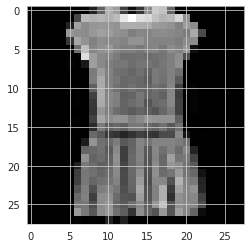

In [5]:
print('Label:', y_train[3])
plt.imshow(X_train[3], cmap='gray')

In [6]:
def plot_images(images, labels=None, correct_labels=None):
    '''Plot images with their labels. Ten each row'''
    plt.figure(figsize=(20,20))
    columns = 10
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        if (not labels is None) and (not correct_labels is None):
            ax.set_title(f"Wr: {labels[i]} Ri: {correct_labels[i]}", fontsize=14)
        elif not labels is None:
            ax.set_title(f"{labels[i]}", fontsize=16)
        
        plt.axis('off')
        plt.subplots_adjust(bottom=0.1)
        plt.imshow(image, cmap='gray')

In [7]:
def get_samples(n_samples, X, y=None):
    '''Get n_samples randomly'''
    samples_index = np.random.choice(np.arange(len(X)), n_samples, replace=False)
    if not y is None:
        return X[samples_index], y[samples_index]
    return X[samples_index]

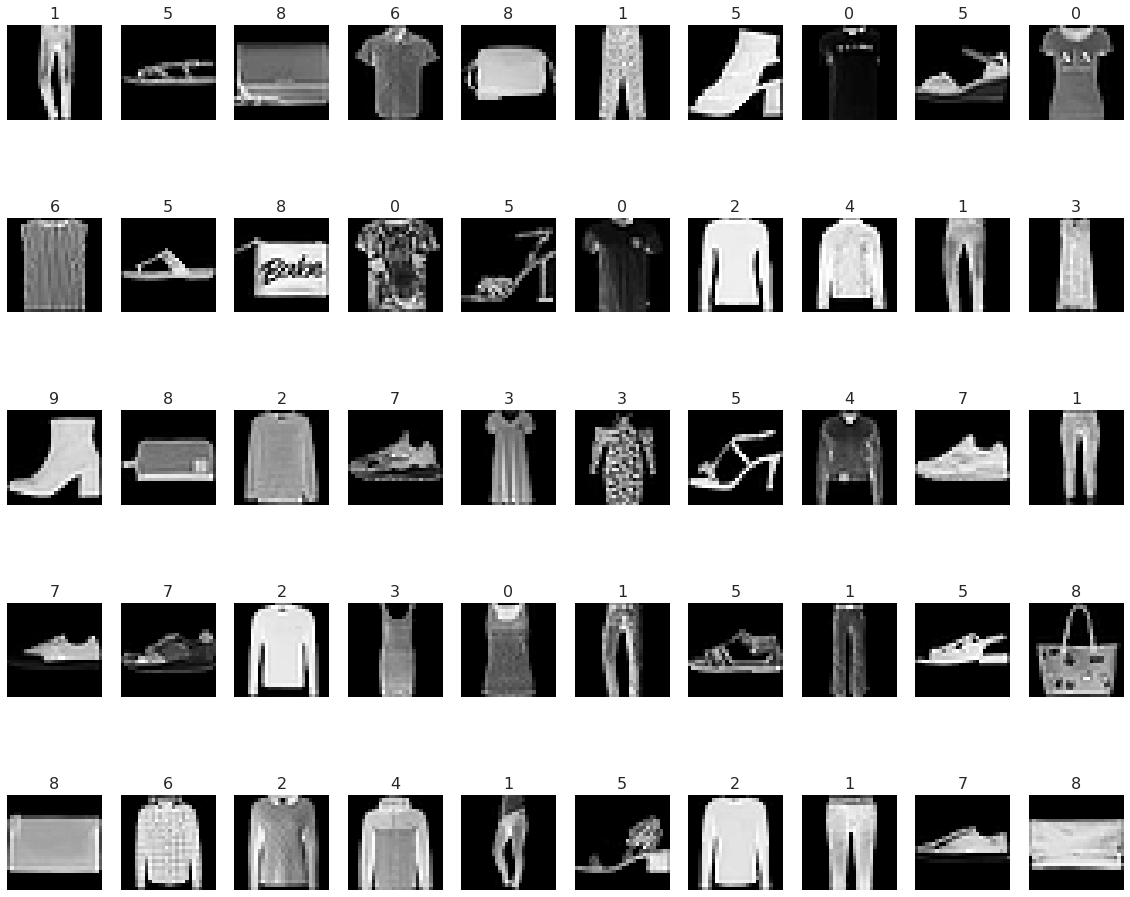

In [8]:
images, labels = get_samples(50, X_train, y_train)
plot_images(images, labels)

# Your Code 

These are numpy arrays:
- X_train 
- y_train 
- X_test 
- y_test

In [9]:
print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


Check the distribution of labels in both train and test. Looks balance!

In [10]:
print('unique values in y_train:', np.unique(y_train, return_counts=True) )
print('unique values in y_test:', np.unique(y_test, return_counts=True) )

unique values in y_train: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))
unique values in y_test: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


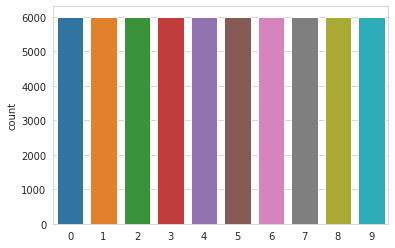

In [11]:
sns.countplot(y_train)

#### Pre-process data:
- Scale pixel values
- Augment the data: shift the images, denoise the images
- Flatten the 2D array --> 1D vector


In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

class DenoiseTransformer(BaseEstimator, TransformerMixin):
	def __init__(self):
		pass

	def fit(self, X, y=None):
		return self
  	
	def denoise(self, src_img, threshold=50, display=False):
    
		new_image = np.minimum(src_img, 255)
		new_image[new_image < threshold] = 0
		if display:
			plt.figure(figsize=(15,15))
			plt.subplot(121),plt.imshow(src_img , cmap='gray')
			plt.subplot(122),plt.imshow(new_image , cmap='gray')
		return new_image  


	def transform(self, X, y=None):
		#return np.array([skimage.color.rgb2gray(img) for img in X])
		return np.array([self.denoise(img) for img in X])

#### ImageGenerator
- To increase different positions of in the training set, new images where object is shifted up, down, left, right 1 - 2 pixels are added. (8 more images are created per original image)

In [13]:
def shift_pixels(src, x, y):
    """
    shift x pixels vertically and y pixels horizontally
    """
    output = shift(src, [x,y], cval=0)
    
    return output

In [14]:
class ShiftTransformer(BaseEstimator, TransformerMixin):
	def __init__(self, y):
		self.y = y
		self.n = y.shape[0]
		pass
    
	def fit(self, X, y=None):
		return self

    
	def image_generator(self, src_image, src_label):
		# create placeholder
		output_image = np.zeros((5, *src_image.shape))

		output_image[0] = shift_pixels(src_image, 1, 0)
		output_image[1] = shift_pixels(src_image, -1, 0)
		#output_image[2] = shift_pixels(src_image, 2, 0)
		#output_image[3] = shift_pixels(src_image, -2, 0)
		output_image[2] = shift_pixels(src_image, 0, 1)
		output_image[3] = shift_pixels(src_image, 0, -1)
		#output_image[6] = shift_pixels(src_image, 0, 2)
		#output_image[7] = shift_pixels(src_image, 0, -2)
		output_image[4] = shift_pixels(src_image, 0, 0)
		output_label = np.array([src_label for i in range(5)])

		return output_image, output_label
    
	def transform(self, X, y=None):
		#print(y)
		X_out = np.zeros((self.n * 5, 28, 28))
		y_out = np.zeros((self.n * 5, ))
		for i in tqdm(range(X.shape[0])):
			X_out[i*5: i*5+5], y_out[i*5:i*5+5] = self.image_generator(X[i], self.y[i])
			
		return X_out, y_out


In [15]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)


denoise_train = DenoiseTransformer()
shift_train = ShiftTransformer(y_train)

denoise_test = DenoiseTransformer()
shift_test = ShiftTransformer(y_test)

denoised_X_train = denoise_train.fit_transform(X_train)
new_X_train, new_y_train = shift_train.fit_transform(denoised_X_train) 

denoised_X_test = denoise_train.fit_transform(X_test)
new_X_test, new_y_test = shift_test.fit_transform(denoised_X_test)

print('New training data: ', new_X_train.shape)
print('New training label:', new_y_train.shape)

print('New test data: ', new_X_test.shape)
print('New test label:', new_y_test.shape)

# Normalization
X_train_flat = new_X_train.reshape((-1, 784)) / 255
X_test_flat = new_X_test.reshape((-1, 784))/255

print('Training data after normalize:', X_train_flat.shape)
print('Test data after normalize:', X_test_flat.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


100%|██████████| 10000/10000 [00:06<00:00, 1477.53it/s]


New training data:  (300000, 28, 28)
New training label: (300000,)
New test data:  (50000, 28, 28)
New test label: (50000,)
Training data after normalize: (300000, 784)
Test data after normalize: (50000, 784)


In [16]:
%%time
from xgboost import XGBClassifier

model_xgboost = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', max_depth=13)
model_xgboost.fit(X_train_flat, new_y_train)


CPU times: user 5min, sys: 3min 11s, total: 8min 12s
Wall time: 8min 12s


Save the model

In [17]:
import pickle

pickle.dump(model_xgboost, open('xgboost_fashion_mnist.pkl', 'wb'))

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
print('Train accuracy:', accuracy_score(new_y_train, model_xgboost.predict(X_train_flat) ))
print('Test accuracy:', accuracy_score(new_y_test, model_xgboost.predict(X_test_flat) ))

Train accuracy: 0.9999066666666667
Test accuracy: 0.88688


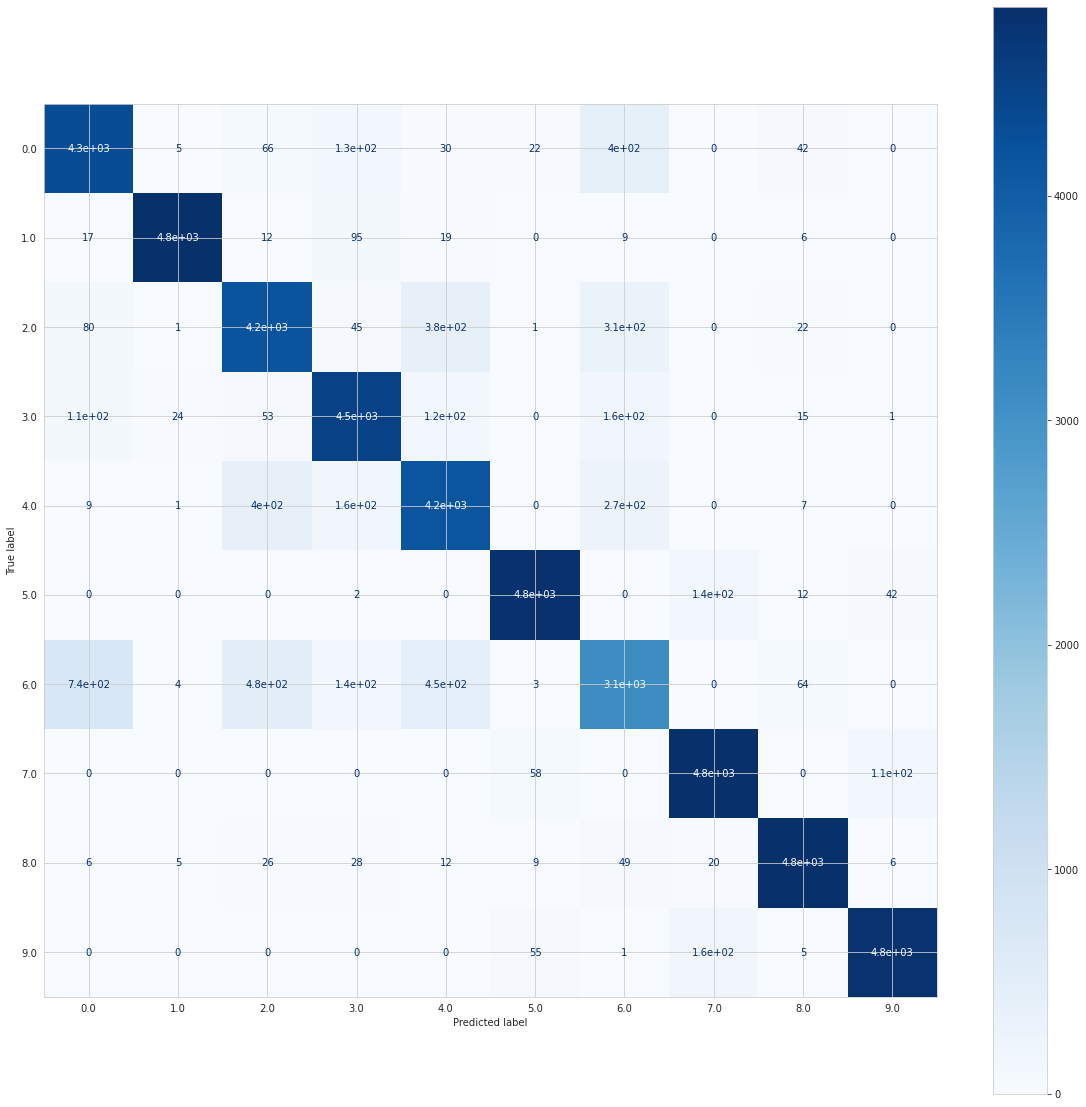

In [26]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(model_xgboost, X_test_flat, new_y_test,
                                  cmap=plt.cm.Blues, ax=ax)


In [ ]:
# y_test_pred = model_SVC.predict(X_test_flat)
# print("Test accuracy:", accuracy_score(new_y_test, y_test_pred))

In [ ]:
# from sklearn.metrics import plot_confusion_matrix
# plt.figure(figsize=(20,20))
# plot_confusion_matrix(model_SVC, X_test_flat, new_y_test,
#                                  cmap=plt.cm.Blues)

#### Model training:
- Linear SVM and Kernel SVM (Bad accuracy and long training time)
- Decision Tree (Bad accuracy)
- Random Forest (Bad accuracy)
- Boosting \& Bagging (Bad accuracy except for XGBoost!)

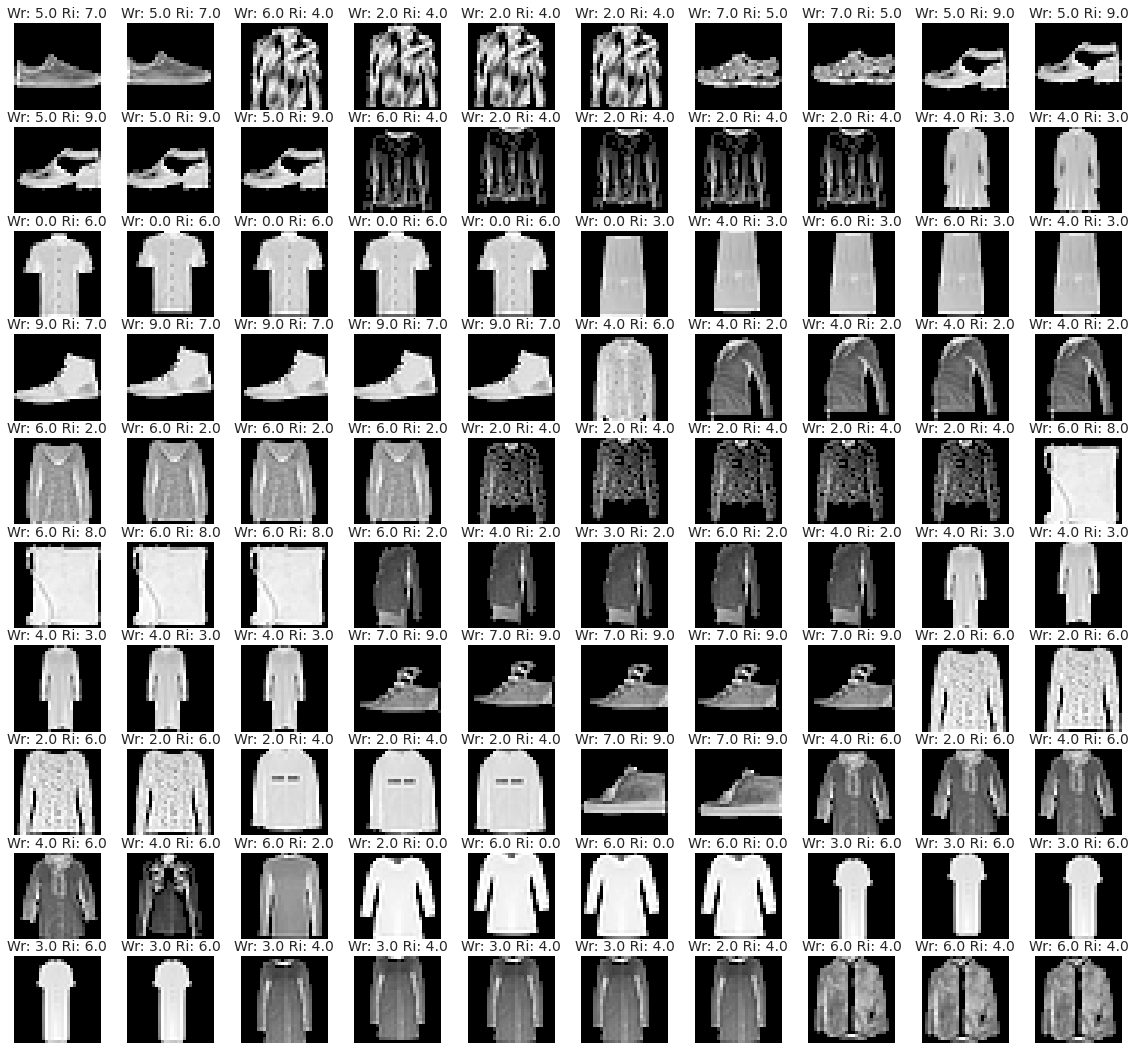

In [27]:
# Your code here
y_test_pred = model_xgboost.predict(X_test_flat)

wrong_predicted_images = X_test_flat[new_y_test != y_test_pred].reshape((-1, 28, 28))[:100]
wrong_predictions = y_test_pred[new_y_test != y_test_pred][:100]
correct_label = new_y_test[new_y_test != y_test_pred][:100]

plot_images(wrong_predicted_images, wrong_predictions, correct_label)

# Test set

Here is the test set without label (FMNIST_augmented_test.npy). You will use your trained machine learning model to make predictions on this test set, and then submit a csv file containing the predictions 

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [29]:
PATH = '/content/gdrive/MyDrive/FTMLE | 2020.11 | Izu/Week_6/Weekly_Project/'
#PATH = './'

In [30]:
X_test_augmented = np.load(PATH + 'FMNIST_augmented_test.npy')

In [31]:
X_test_augmented.shape

(40000, 28, 28)

In [33]:
np.min(X_train[3]), np.max(X_train[3]), np.mean(X_train[3]), np.std(X_train[3])

(0, 255, 59.50127551020408, 64.84929545355179)

In [32]:
np.min(X_test_augmented[5]), np.max(X_test_augmented[5]), np.mean(X_test_augmented[5]), np.std(X_test_augmented[5])

(0, 289, 42.54209183673469, 56.40644470082726)

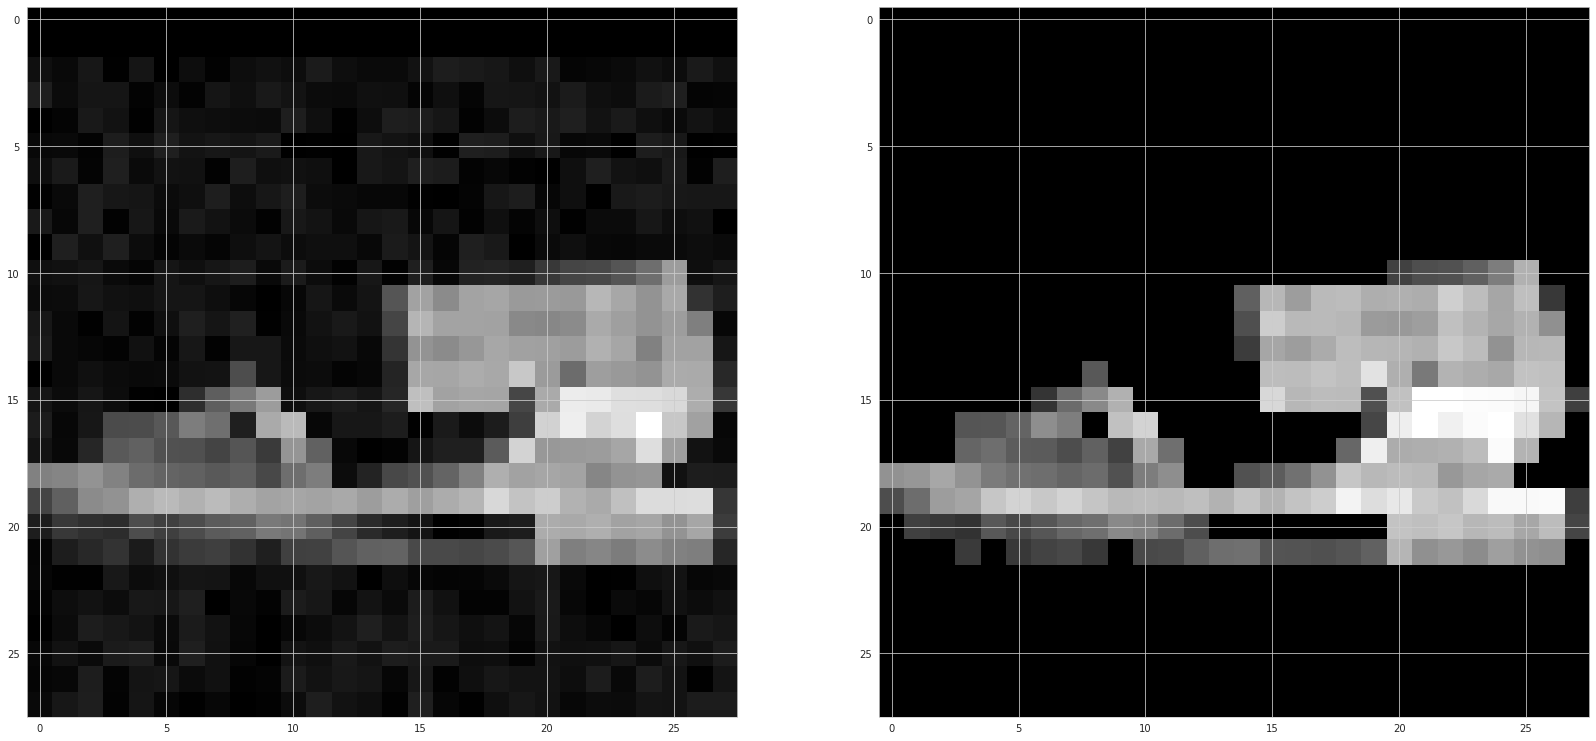

In [34]:
plt.figure(figsize=(28,28))
test_image = X_test_augmented[50]
new_image = np.minimum(test_image, 255)
new_image[new_image < 50] = 0
plt.subplot(121),plt.imshow(test_image , cmap='gray')
plt.subplot(122),plt.imshow(new_image , cmap='gray')
plt.show()

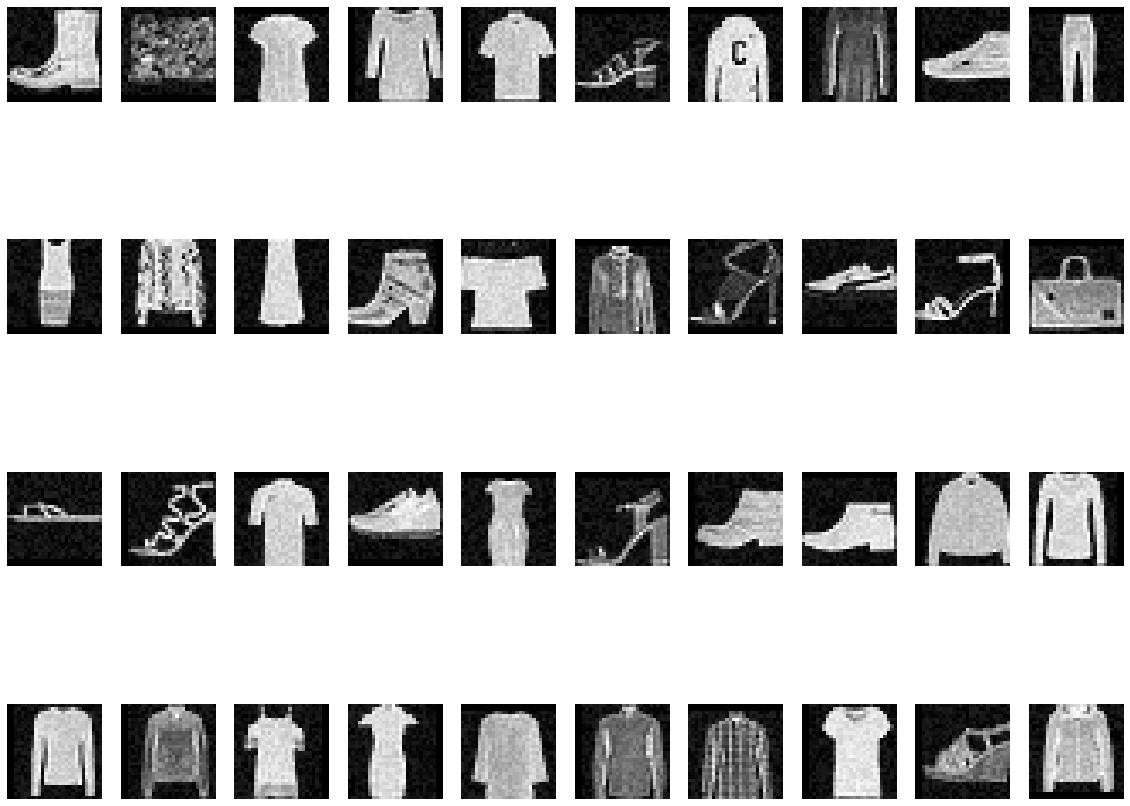

In [35]:
images = get_samples(40, X_test_augmented)
plot_images(images)

Note: pay close attention to this test set. This test set is slightly different from the train set. In order to improve your model, make sure you know what the difference is so that you can perform appropriate processings.

** From my observation, the images in the test set are not centered and kind of shifting around a few pixels, there are noisy pixels in the images as well **

# Submit your predictions as csv file

In [40]:
# let's make a silly prediction that every image is T-shirt, meaning every prediction is 0
# Here is how you can make such prediction
#predictions = np.zeros(shape=[len(X_test_augmented),]).astype(int)

# preprocess the X_test_augmented by denoise and normalize the pixels

processed_X_test = denoise_train.transform(X_test_augmented)

print('Processed X test:', processed_X_test.shape)

X_unseen_flat = processed_X_test.reshape((-1, 784))/255

print('Processed X test:', X_unseen_flat.shape)

print(np.max(X_unseen_flat[10]), np.min(X_unseen_flat[10]), np.mean(X_unseen_flat[10]), np.std(X_unseen_flat[10]) )
predictions = model_xgboost.predict(X_unseen_flat)

Processed X test: (40000, 28, 28)
Processed X test: (40000, 784)
1.0 0.0 0.39014605842336936 0.3722297517954459


In [41]:
predictions.shape # make sure that you have 40000 predictions, since the hidden test set has 40000 images

(40000,)

In [42]:
pred_df = pd.DataFrame(predictions,columns=['pred'])
pred_df.head()

,pred
0,8.0
1,3.0
2,9.0
3,5.0
4,9.0


In [43]:
MY_NAME='khuongtran'
#
pred_df.to_csv(PATH + f"/submissions/{MY_NAME}_submission.csv", index=None)

By running the cell above, you actually submit your predictions directly to the submissions folder in Weekly_Project folder, as I have granted you permission to save files there. Let me know if you have any problem running the cell above.



Good luck!